In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

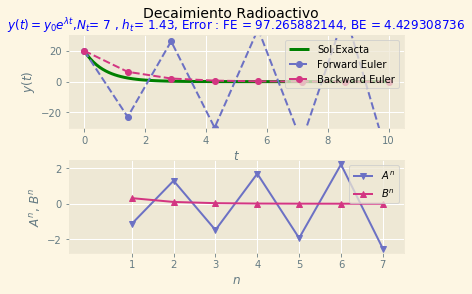

In [2]:
def mesh(a, b, Nt):
    """
    Funcion para definir la malla
    """
    ht = (b-a) / Nt
    return ht

def exactSolution(t ,y0 ,lam):
    """
    Funcion para calcular la solucion analitica
    """
    return y0 * np.exp(-lam * t)

def forwardEuler(y, ht, lam):
    """
    Funcion que se encarga que realizar las diferencias finitas de Euler hacia adelante
    """
    A = 1 - ht*lam
    An = [A]
    for i, val in enumerate (y[0:-1]):
        y[i+1] = A * y[i]
        An.append(An[i] * A)
    return An

def backwardEuler (y, ht, lam):
     """
    Funcion que se encarga que realizar las diferencias finitas de Euler hacia atras
    """
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in enumerate (y[0: -1]):
        y[i+1] = B * y[i]
        Bn.append(Bn[i] * B)
    return Bn


"""
Parametros iniciales
"""
Nt = 7
Tmax = 10
ht = mesh(0, Tmax, Nt)
y0 = 20
lam = 1.5

t = np.linspace(0 ,Tmax, Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)

yf[0] = y0
yb[0] = y0


"""
Mandando a llamar a las variables An y Bn
"""
An=forwardEuler(yf, ht, lam)
Bn=backwardEuler(yf, ht, lam)

"""
Calculo del error para Euler hacia adelante y hacia atras
"""
error_f = forwardEuler(yf, ht, lam)
error_b = backwardEuler(yb, ht, lam)

tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution(tl, y0, lam)
y_exac_p = exactSolution(t, y0, lam)

norma_error_f = np.linalg.norm(yf - y_exac_p,2)
norma_error_b = np.linalg.norm(yb - y_exac_p,2)


Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {} '.format(Nt) + ', $h_t$' + '= {:03.2f}'.format(ht)
Error = ', Error : FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f, norma_error_b)

"""
Se realiza la implementacion para graficas los resultados obtenidos
"""

plt.style.use(['Solarize_Light2'])
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)

ax1.plot(tl, y_exacta, 'g-', lw =3, label = 'Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label = 'Forward Euler')
ax1.plot(t, yb, 'C6o--', label = 'Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12 , color='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc ='upper right', ncol=1 , framealpha=0.75, fancybox=True ,fontsize =10)
ax1.grid(color ='w')

nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks, An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim(-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc ='upper right', ncol=1, framealpha=0.75, fancybox=True, fontsize=10)
ax2.grid(color='w')

"""
Se realiza la implementacion para guardar los graficos de los resultados obtenidos
"""

plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

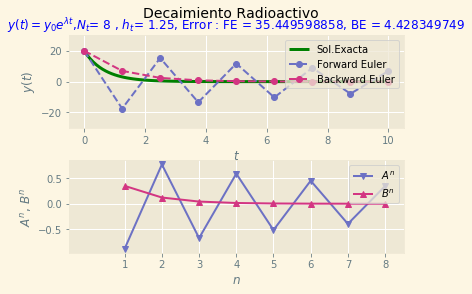

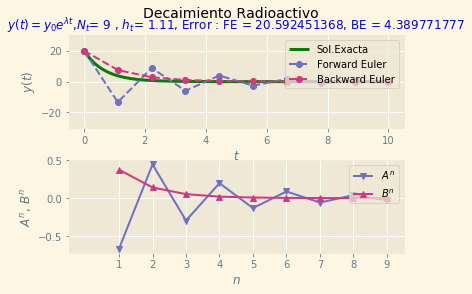

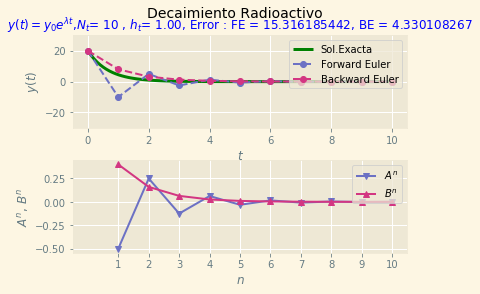

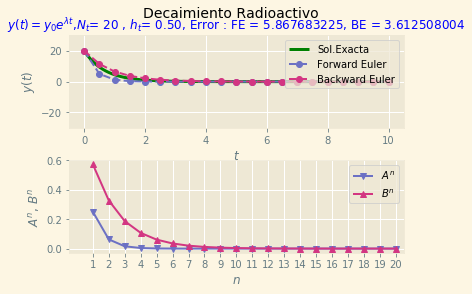

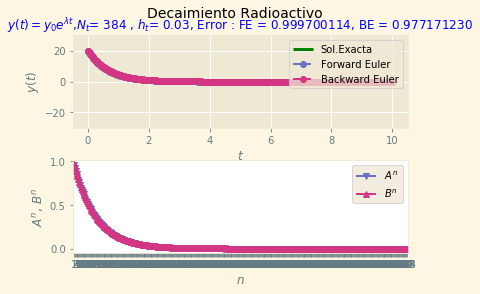